<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/4week/winequality_with_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';').dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [8]:
y

,quality
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [9]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...,...
4426,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9
466,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4
3092,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4
3772,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6


In [10]:
y_train

,quality
4665,6
1943,5
3399,6
843,7
2580,5
...,...
4426,6
466,6
3092,6
3772,6


In [11]:
# 4. 데이터 스케일링
# 로지스틱 회귀는 스케일링이 중요합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.51511931, -1.07623315,  0.22773076, ..., -0.32826101,
        -0.70244474,  1.54037099],
       [-0.66918809, -0.28877673,  0.89583195, ..., -0.06188569,
         0.26607415, -0.82171197],
       [-1.49820327,  0.40024764, -0.02280718, ...,  0.40427112,
         0.00193263,  0.48150622],
       ...,
       [ 0.87041153, -0.09191263,  1.56393313, ..., -1.12738698,
         0.35412132,  0.72585963],
       [-0.66918809, -0.38720878, -0.35685777, ..., -0.12847952,
        -0.96658625,  0.07425053],
       [ 1.46256523, -0.09191263,  0.14421812, ...,  0.20448963,
         1.23459303, -0.08865174]])

In [12]:
from sklearn.linear_model import LogisticRegression
# 5. 모델 학습
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

모델 정확도: 0.5316


In [13]:
# 7. 기울기(coef_)와 절편(intercept_) 출력
# 멀티클래스이므로 각 클래스에 대한 기울기/절편이 존재
print("\n모델의 기울기(Coefficient):")
print(model.coef_)
print("\n모델의 절편(Intercept):")
print(model.intercept_)


모델의 기울기(Coefficient):
[[ 0.79326449  0.53231419 -0.00863581 -0.34600414  0.51091977  0.47229667
  -0.22830646 -0.09584739  0.27770677 -0.32832087 -0.43042432]
 [-0.35707719  0.63938632  0.00892701 -1.23811009  0.23958428 -0.78414659
  -0.03856285  1.23983666 -0.43726709 -0.09471884 -0.59175943]
 [-0.496341    0.26186895  0.0081019  -0.51420803  0.21545654 -0.24638827
   0.21122426  0.67157658 -0.49251758 -0.07793801 -0.88882873]
 [-0.61837474 -0.33920297  0.01461334 -0.24815891  0.27231941 -0.08526451
   0.10264684  0.69103552 -0.47431288  0.05265862  0.23386071]
 [-0.16085575 -0.52012914 -0.10464967  0.92134149 -0.04849541  0.02309749
   0.07176469 -0.98478374 -0.03851827  0.27630237  0.16431039]
 [-0.23697177 -0.46971777 -0.04321698  1.11240693  0.23617655  0.27613108
   0.11509882 -0.92726153 -0.03800773  0.21957136  0.62368104]
 [ 1.07635596 -0.10451959  0.12486022  0.31273276 -1.42596114  0.34427413
  -0.2338653  -0.5945561   1.20291677 -0.04755462  0.88916033]]

모델의 절편(Intercept

Binary Classification

In [14]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';').dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
# 2. 종속 변수 (y)를 이진 분류로 변환
# 품질 7 이상을 '좋은 와인'(1), 7 미만을 '나쁜 와인'(0)으로 정의
df['is_good_wine'] = (df['quality'] >= 7).astype(int)
df['is_good_wine']

,is_good_wine
0,0
1,0
2,0
3,0
4,0
...,...
4893,0
4894,0
4895,0
4896,1


In [17]:
# 3. 독립 변수 (X)와 새로운 종속 변수 (y_binary) 분리
# 시각화를 위해 두 가지 독립 변수만 선택
features_for_viz = ['alcohol', 'density']
X = df[features_for_viz]
y_binary = df['is_good_wine']
X

,alcohol,density
0,8.8,1.00100
1,9.5,0.99400
2,10.1,0.99510
3,9.9,0.99560
4,9.9,0.99560
...,...,...
4893,11.2,0.99114
4894,9.6,0.99490
4895,9.4,0.99254
4896,12.8,0.98869


In [18]:
y_binary

,is_good_wine
0,0
1,0
2,0
3,0
4,0
...,...
4893,0
4894,0
4895,0
4896,1


In [19]:
# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
X_train

,alcohol,density
806,9.6,0.99750
3698,11.6,0.98961
1116,10.5,0.99220
2160,11.0,0.99540
2455,9.6,0.99692
...,...,...
4059,11.3,0.99058
3679,10.5,0.99444
252,8.7,0.99750
3742,9.0,0.99792


In [20]:
y_train

,is_good_wine
806,0
3698,0
1116,0
2160,0
2455,0
...,...
4059,0
3679,1
252,0
3742,1


In [21]:
# 5. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.73429331,  1.14190349],
       [ 0.88561119, -1.46942753],
       [-0.00533629, -0.61222254],
       ...,
       [-1.46325034,  1.14190349],
       [-1.22026467,  1.28090971],
       [-0.89628377,  0.11590525]])

In [22]:
# 6. 모델 학습 (이진 로지스틱 회귀)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"이진 분류 모델 정확도: {accuracy:.4f}")

이진 분류 모델 정확도: 0.8010


In [23]:
# 8. 기울기(coef_)와 절편(intercept_) 출력 (하나씩 나옴!)
print("\n모델의 기울기(Coefficient):")
print(model.coef_)
print("\n모델의 절편(Intercept):")
print(model.intercept_)


모델의 기울기(Coefficient):
[[ 9.90011369e-01 -1.45607431e-04]]

모델의 절편(Intercept):
[-1.53889926]


<Axes: >

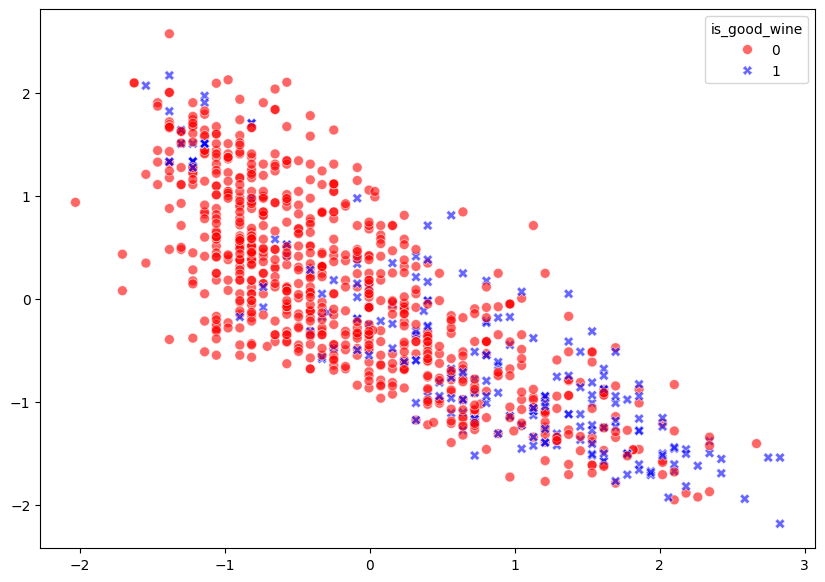

In [24]:
# 9. 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test,
                palette={0: 'red', 1: 'blue'}, alpha=0.6, s=50,
                legend='full', style=y_test, markers=['o', 'X'])

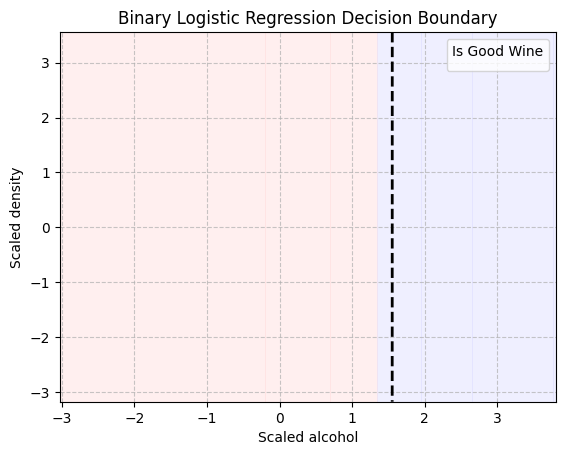

In [25]:
# 결정 경계(Decision Boundary) 시각화
# 2D 평면을 위한 격자 생성
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 모델의 예측 확률 계산
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 등고선을 이용한 결정 경계 및 확률 분포 표시
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFCCCC', '#CCCCFF']))
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black', linestyles='--')

plt.title('Binary Logistic Regression Decision Boundary')
plt.xlabel(f'Scaled {features_for_viz[0]}')
plt.ylabel(f'Scaled {features_for_viz[1]}')
plt.legend(title='Is Good Wine', loc='upper right', labels=['Not Good (0)', 'Good (1)'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()